In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [11]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [12]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [14]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

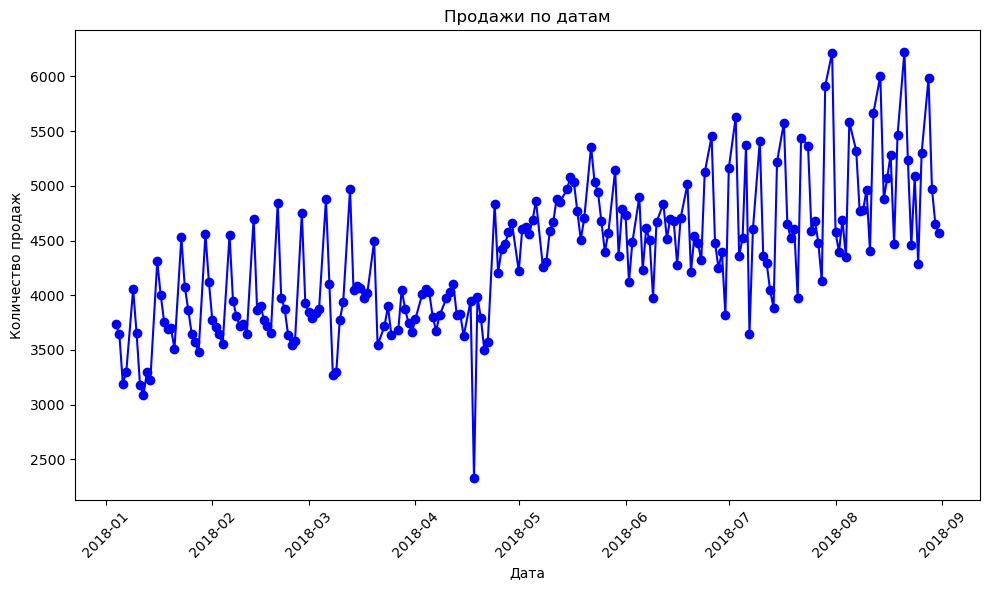

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b')

plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [103]:
На графике у нас есть даты (по оси X) и количество продаж (по оси Y). Мы видим линию, которая показывает, как менялось количество продаж с каждым днем.
Если линия поднималась, это означало, что продажи увеличивались.
Если линия опускалась, значит продажи снижались.
В некоторых местах линия может быть плоской — это может означать, что продажи оставались примерно одинаковыми в несколько дней.
Также на оси X будут помечены даты, и если их много, то они могут быть покручены (для удобства), чтобы все поместилось.
График показывает, как менялись продажи — были ли пики (когда продажи сильно выросли) или падения (когда продажи снизились).

SyntaxError: invalid character '—' (U+2014) (3889022451.py, line 4)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [104]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
День недели                       3
Месяц                             6
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [113]:
weather_df = weather_df.loc[:, ~weather_df.columns.str.contains('^Unnamed')]

print(weather_df.columns)

if len(weather_df.columns) == 17:
    weather_df.columns = ['Дата', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Cl', 'Nh', 'H']
else:
    print("Количество столбцов не совпадает. Проверьте структуру данных.")

weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M')

daily_avg_temp = weather_df.groupby(weather_df['Дата'].dt.date)['T'].mean().reset_index()

print(daily_avg_temp.head())

Index(['Дата', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW',
       'W1', 'W2', 'Cl', 'Nh', 'H'],
      dtype='object')
         Дата        T
0  2025-01-01 -10.4375
1  2025-01-02  -6.3875
2  2025-01-03  -4.2750
3  2025-01-04  -4.2000
4  2025-01-05  -6.6375


In [117]:
print(merged_df.head())

        Дата  Количество   T
0 2018-01-04        3734 NaN
1 2018-01-05        3643 NaN
2 2018-01-06        3193 NaN
3 2018-01-07        3298 NaN
4 2018-01-09        4055 NaN


In [124]:
print(merged_df.columns)

Index(['Дата', 'Количество', 'T'], dtype='object')


In [129]:
merged_df['Количество'] = merged_df['Количество'].fillna(merged_df['Количество'].mean())
merged_df['T'] = merged_df['T'].fillna(merged_df['T'].mean())

In [130]:
merged_df.describe()

,Дата,Количество,T
count,205,205.000000,0.0
mean,2018-05-03 16:58:32.195121920,4338.863415,NaN
min,2018-01-04 00:00:00,2326.000000,NaN
25%,2018-03-04 00:00:00,3821.000000,NaN
50%,2018-05-04 00:00:00,4319.000000,NaN
75%,2018-07-03 00:00:00,4702.000000,NaN
max,2018-08-31 00:00:00,6226.000000,NaN
std,NaN,647.708957,NaN


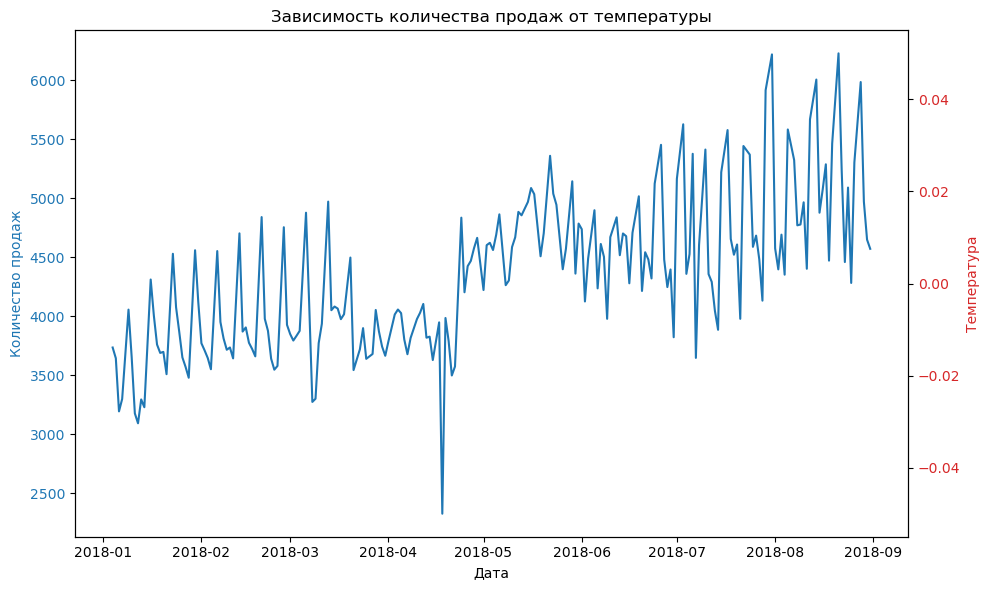

In [134]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='tab:blue', label='Количество продаж')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Температура', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['T'], color='tab:red', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Зависимость количества продаж от температуры')
plt.tight_layout()
plt.show()